In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Regresión lineal simple
**Facundo A. Lucianna - Inteligencia Artificial - CEIA - FIUBA**

El objetivo es determinar la relación entre la concentración de un fármaco en el torrente sanguíneo y el tiempo transcurrido desde su administración. Se recopilan datos sobre la concentración del fármaco en el torrente sanguíneo en diferentes intervalos de tiempo posteriores a la administración.

In [2]:
dataset = pd.read_csv("datasets/drug.csv") # cargando los datos desde un csv
dataset.head(10)

,Time,Concentration
0,0.000000,98.607801
1,0.200930,98.640061
2,0.246241,91.323087
3,0.303356,85.141347
4,0.364378,93.402487
5,0.378042,89.197027
6,0.417262,91.931610
7,0.526640,90.533796
8,0.671365,81.727693
9,0.703716,81.126258


Veamos una descripción del conjunto de datos:

In [3]:
dataset.describe()

,Time,Concentration
count,50.000000,50.000000
mean,1.837241,61.162161
std,1.122143,23.448881
min,0.000000,13.684360
25%,1.002335,42.859060
50%,1.646105,63.195569
75%,2.808956,80.721376
max,4.000000,98.640061


Y la distribución de los atributos `Time` y el valor `Concentration`:

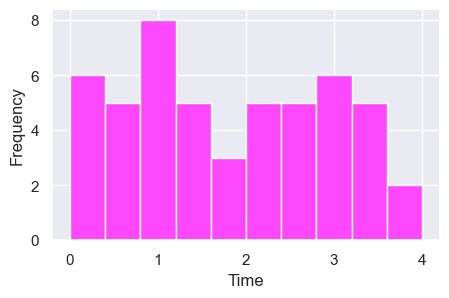

In [4]:
# Pandas nos ofrece algunas herramientas de visualización
plt.figure(figsize=(5, 3))
dataset["Time"].hist(color='#ff48fd')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

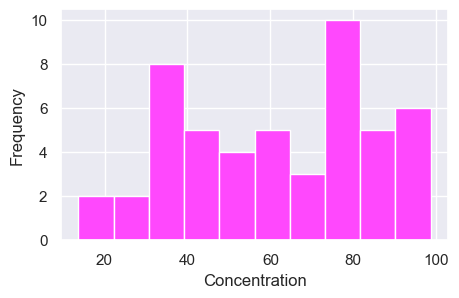

In [5]:
plt.figure(figsize=(5, 3))
dataset.Concentration.hist(color='#ff48fd')
plt.xlabel("Concentration")
plt.ylabel("Frequency")
plt.show()

A continuación, observemos un mapa de correlación para analizar si el atributo `Time` está correlacionado con el valor `Concentration`:

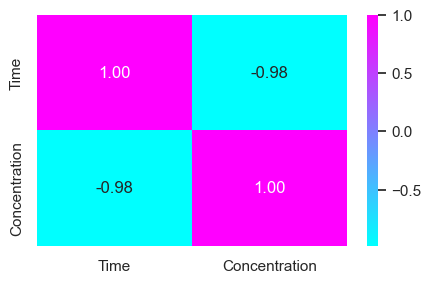

In [6]:
# Calculamos la correlación cruzada
correlacion_drug = dataset[["Time", "Concentration"]].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(correlacion_drug, annot=True, annot_kws={"size": 12}, fmt=".2f", cbar=True, cmap="cool")
plt.show()

En el mapa de correlación vemos una correlación cruzada casi exacta. Dado que estamos trabajando con un solo atributo, podemos graficar los puntos para observar si existe una relación lineal entre ambas variables:

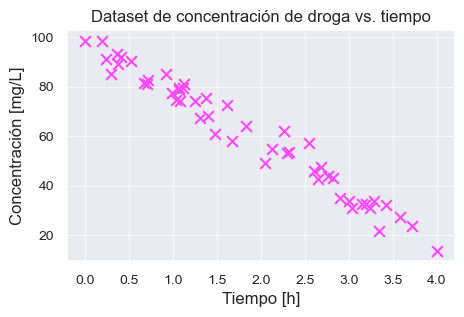

In [7]:
plt.figure(figsize=(5, 3))
plt.scatter(dataset['Time'], dataset['Concentration'], color='#ff48fd', marker="x", s=60)
plt.grid(True, linewidth=0.5)
plt.xlabel('Tiempo [h]', fontsize=12)
plt.ylabel('Concentración [mg/L]', fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Dataset de concentración de droga vs. tiempo', fontsize=12)
plt.show()

Con los datos a la vista, podemos confirmar que existe una clara relación lineal entre las dos variables. Por lo tanto, asumimos que podemos utilizar **regresion lineal simple** (ya que hay una variable independiente y otra dependiente) para resolver el problema.

Ahora procederemos a construir el modelo, siguiendo el proceso de Machine Learning que vimos anteriormente.

![proceso ML](./img/proceso_ml.png)

Es decir, necesitaremos un conjunto de datos de entrenamiento y otro de prueba. Esto se puede hacer fácilmente utilizando la librería [scikit-learn](https://scikit-learn.org/stable/), que nos permite separar nuestros datos para entrenar y evaluar el modelo.

Separemos el conjunto de datos entre el conjunto de entrenamiento y el de evaluación.

> ⚠️ **Nota:** En este caso particular, no es necesario realizar ninguna tarea de preprocesamiento.

In [8]:
from sklearn.model_selection import train_test_split

# Armamos un DataFrame con los features
X = dataset[["Time"]]
# Y con la variable dependiente (target)
y = dataset["Concentration"]

Observa que, aunque estamos utilizando un solo atributo, siempre debemos mantener los valores de `X` en formato tabular, ya sea como un array de 2D o un DataFrame de Pandas:

In [9]:
print(f"X es de tipo: {type(X)}")
print(f"El shape es de 2D: {X.shape}")
X.head()

X es de tipo: <class 'pandas.core.frame.DataFrame'>
El shape es de 2D: (50, 1)


,Time
0,0.000000
1,0.200930
2,0.246241
3,0.303356
4,0.364378


En cambio, los valores de `y` deben estar en una sola dimensión, es decir, un array de 1D o una serie de Pandas:

In [10]:
print(f"El label es de tipo: {type(y)}")
print(f"El shape es de 1D: {y.shape}")
y.head()

El label es de tipo: <class 'pandas.core.series.Series'>
El shape es de 1D: (50,)


0    98.607801
1    98.640061
2    91.323087
3    85.141347
4    93.402487
Name: Concentration, dtype: float64

Tenemos la siguiente cantidad de observaciones:

In [11]:
print("Cantidad de observaciones en 'X':", X.shape[0])
print("Cantidad de atributos en 'X':", X.shape[1])
print("Cantidad de observaciones en 'y':", y.shape[0])

Cantidad de observaciones en 'X': 50
Cantidad de atributos en 'X': 1
Cantidad de observaciones en 'y': 50


Ahora, separamos el conjunto de datos en entrenamiento y prueba. Para este caso, utilizamos un 30% de los datos para prueba:

In [12]:
# Separando nuestro dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Quedando con la siguiente separación:

In [13]:
print("Valores de X_train:",X_train.size)
print("Valores de y_train:",y_train.size)
print("Valores de X_test:",len(X_test))
print("Valores de y_test:",len(y_test))

Valores de X_train: 35
Valores de y_train: 35
Valores de X_test: 15
Valores de y_test: 15


Para aplicar el modelo de regresión lineal, podemos usar **scikit-learn**. Los parámetros y formas de uso se pueden consultar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [14]:
# Creando el modelo de regresión lineal simple:
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()

**scikit-learn** interactúa con Jupyter Notebook para mostrarnos información, por ejemplo, aquí nos indica que el modelo no está entrenado:

In [15]:
regresion

LinearRegression()

Ahora lo entrenamos utilizando el método `.fit()`:

In [16]:
regresion.fit(X_train, y_train)

LinearRegression()

Una vez entrenado el modelo, podemos ver diferentes atributos de la clase:

In [17]:
print(f"El valor de la intersección de la recta es {round(regresion.intercept_, 3) }")
print(f"El valor del coeficiente de la recta es {np.round(regresion.coef_, 3) }")
print(f"La ecuación de la recta entonces es: y = {np.round(regresion.intercept_, 3) }+({np.round(regresion.coef_[0], 3)})x")

El valor de la intersección de la recta es 99.526
El valor del coeficiente de la recta es [-20.756]
La ecuación de la recta entonces es: y = 99.526+(-20.756)x


Veamos el coeficiente de Pearson del conjunto de entrenamiento:

In [18]:
print(f"El coeficiente de Pearson es {round(regresion.score(X_train, y_train), 2)}")

El coeficiente de Pearson es 0.97


Observamos que el coeficiente de Pearson es muy cercano al valor de la correlación, ya que ambos están midiendo lo mismo.

A continuación, calculemos el desvío estándar del modelo. Primero, obtenemos las predicciones del modelo utilizando `.predict()`:

In [19]:
y_model = regresion.predict(X_train)

Con estos valores, podemos calcular el desvío estándar:

In [20]:
std_dev_model = np.sqrt((np.sum((y_train - y_model)**2))/(y_train.size - 2))
print(f"Desvío estándar del modelo {round(std_dev_model, 3)}")

Desvío estándar del modelo 4.01


Como estamos en un problema de regresión lineal simple, podemos visualizar la regresión:

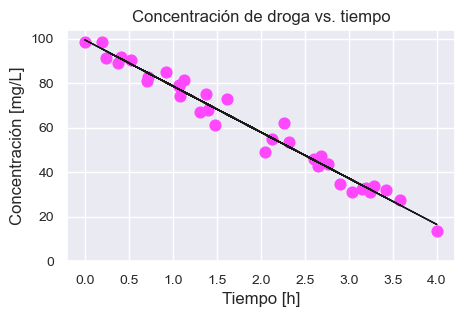

In [21]:
plt.figure(figsize=(5, 3))
plt.title('Concentración de droga vs. tiempo', fontsize=12)
plt.xlabel('Tiempo [h]', fontsize=12)
plt.ylabel('Concentración [mg/L]', fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.scatter(X_train, y_train, color='#ff48fd', marker="o", s=60)
plt.plot(X_train, regresion.predict(X_train), color="k", linewidth=1)

plt.ylim(0)
plt.show()

Además, dado que el conjunto de entrenamiento es pequeño, podemos graficar cada residuo:


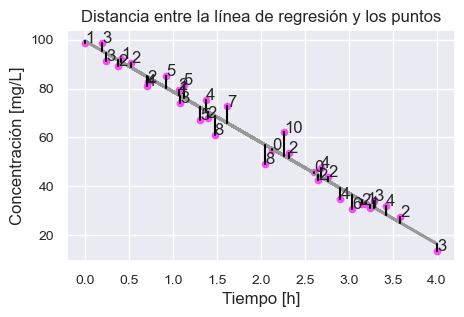

In [22]:
# Obtenemos los coeficientes
b = regresion.intercept_
w0 = regresion.coef_[0]

# Calcular las distancias entre los puntos y la línea de regresión
distances = np.abs(y_model - y_train)

# Graficar los puntos
plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train, color='#ff48fd', s=20)

# Graficar la línea de regresión
plt.plot(X_train, y_model, color='#999999', linewidth=2)

# Graficar las líneas perpendiculares desde cada punto a la línea de regresión
for x, y, distance in zip(X_train.to_numpy().flatten(), y_train, distances):
    plt.plot([x, x], [y, w0*x + b], color='black', linestyle='-')
    plt.text(x, y, f'{distance:.0f}', ha='left', va="baseline", fontsize=12)

# Configuraciones adicionales
plt.title("Distancia entre la línea de regresión y los puntos", fontsize=12)
plt.xlabel('Tiempo [h]', fontsize=12)
plt.ylabel('Concentración [mg/L]', fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.show()

----
## Metricas

Entrenamos el modelo, pero para validar si está bien entrenado, debemos utilizar el conjunto de prueba.

Vamos a aplicar las siguientes métricas de evaluación usando **scikit-learn**:
- $R^2$
- MAE
- MSE
- RMSE
- MAPE

Primero, obtenemos las predicciones del modelo para el conjunto de prueba:

In [23]:
y_pred = regresion.predict(X_test)

Importamos todas las métricas directamente desde **scikit-learn**:

In [24]:
from sklearn.metrics import (r2_score, mean_absolute_error, 
                             mean_squared_error, root_mean_squared_error, 
                             mean_absolute_percentage_error)

In [25]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

Veamos los resultados:

In [26]:
print("R-cuadrado en test:", round(r2, 3))
print("Error absoluto medio:", round(mae, 3))
print("Error cuadrático medio:", round(mse, 3))
print("Raíz de error cuadrático medio:", round(rmse, 3))
print(f"Error absoluto porcentual medio: {mape*100:.2f}%")

R-cuadrado en test: 0.949
Error absoluto medio: 3.929
Error cuadrático medio: 24.514
Raíz de error cuadrático medio: 4.951
Error absoluto porcentual medio: 8.26%


Observamos que el $R^2$ es similar al valor del conjunto de entrenamiento, lo que indica un buen ajuste. Además, el RMSE es cercano al desvío estándar calculado previamente, lo cual refuerza la idea de que el modelo está bien ajustado, algo que ya intuíamos visualmente.

Estas no son las únicas métricas que se pueden calcular. scikit-learn documenta varias [métricas de regresión](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

----

Finalmente, dado que hemos entrenado el modelo y estamos conformes con sus métricas, queremos usarlo para hacer predicciones. Sin embargo, si cerramos el notebook, perderemos todo el trabajo realizado. Por lo tanto, necesitamos persistir el modelo de alguna forma. En este caso, utilizaremos **joblib**:

In [27]:
import joblib

with open('modelo_regresion_lineal.pkl', 'wb') as archivo:
    joblib.dump(regresion, archivo)

Una vez persistido, podemos cargar el modelo cuando lo necesitemos. Es importante asegurarnos de mantener la misma versión del modelo y las librerías utilizadas durante el entrenamiento:

In [28]:
with open('modelo_regresion_lineal.pkl', 'rb') as archivo:
    modelo_cargado = joblib.load(archivo)

Veamos un ejemplo de uso y comparemos las predicciones del modelo cargado con las predicciones del modelo entrenado:

In [29]:
X_pred = pd.DataFrame({"Time": [1, 3.5]}) # Quiero predecir valores para 1 y 3 horas y media

predicciones = modelo_cargado.predict(X_pred) 
predicciones

array([78.77003499, 26.88028203])

In [30]:
predicciones2 = regresion.predict(X_pred) 
predicciones2

array([78.77003499, 26.88028203])